In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
from sklearn.ensemble import IsolationForest

In [2]:
j13 = pd.read_csv("journal13.csv", index_col=0)
j14 = pd.read_csv("journal14.csv", index_col=0)

In [3]:
#j13 = pd.read_excel("ABC 2013 JEs.xlsx")

In [5]:
j13.head()

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,...,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator,DOW_entry_date,DOW_effective_date
0,2013-0001-0210000003,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
1,2013-0001-0210000003,2,60000113,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
2,2013-0001-0210000003,3,20001102,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
3,2013-0001-0210000006,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,JE Line Description1,EY EMPTY,N,0,4
4,2013-0001-0210000006,2,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4


In [4]:
#j14 = pd.read_excel("ABC 2014 JEs.xlsx")

In [6]:
j14.head()

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,...,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator,DOW_entry_date,DOW_effective_date
0,2014-0001-0210000003,1,60000001,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,2,2
1,2014-0001-0210000003,2,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,2,2
2,2014-0001-0210000003,3,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,2,2
3,2014-0001-0210000003,4,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,2,2
4,2014-0001-0210000003,5,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,2,2


**2013 sowie 2014 sind die Abweichungen der Summen von 0 bei den jeweiligen Journalnummern vernachlässigbar:**

In [5]:
sums13 = j13.groupby("JE number").aggregate({"Functional amount": sum})

In [6]:
sums13 = j13.groupby("JE number").aggregate({"Functional amount": sum})
all(np.abs(sums13["Functional amount"]) < 1e-7)

True

In [7]:
sums14 = j14.groupby("JE number").aggregate({"Functional amount": sum})
all(np.abs(sums14["Functional amount"]) < 1e-7)

True

**Wochentage**

Effective date= Buchungsdatum  

Entry date= Belegdatum

In [12]:
#j13['DOW_entry_date'] = j13["Entry date"].dt.dayofweek
#j13['DOW_effective_date'] = j13["Effective date"].dt.dayofweek

In [6]:
#j14['DOW_entry_date'] = j14["Entry date"].dt.dayofweek
#j14['DOW_effective_date'] = j14["Effective date"].dt.dayofweek

**Folgende Variablen beinhalten keine Informationen:**

Functional currency code         
Business unit code               
Business unit                    
Approver ID

In [13]:
j13.apply('nunique')

Unnamed: 0                  384008
JE number                   110285
JE line number                 634
GL account code                475
Fiscal year                      1
Fiscal period                   12
Effective date                 364
Entry date                     384
Source code                     74
Source                          74
Source group                    14
Functional amount           177204
Functional currency code         1
Business unit code               1
Business unit                    1
Preparer ID                     42
Preparer department              7
JE line description            264
Approver ID                      1
Reversal Indicator               2
DOW_entry_date                   7
DOW_effective_date               7
dtype: int64

In [8]:
j14.apply('nunique')

JE number                    98823
JE line number                 246
GL account code                476
Fiscal year                      1
Fiscal period                   12
Effective date                 363
Entry date                     386
Source code                     78
Source                          78
Source group                    15
Functional amount           176453
Functional currency code         1
Business unit code               1
Business unit                    1
Preparer ID                     48
Preparer department              9
JE line description            264
Approver ID                      1
Reversal Indicator               2
DOW_entry_date                   7
DOW_effective_date               7
dtype: int64

In [9]:
# j13.to_csv("journal13.csv")
# j14.to_csv("journal14.csv")

In [3]:
df = pd.concat([j13, j14])

In [8]:
df.head()

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,...,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator,DOW_entry_date,DOW_effective_date
0,2013-0001-0210000003,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
1,2013-0001-0210000003,2,60000113,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
2,2013-0001-0210000003,3,20001102,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4
3,2013-0001-0210000006,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,JE Line Description1,EY EMPTY,N,0,4
4,2013-0001-0210000006,2,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,...,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N,0,4


In [4]:
df.drop(["Functional currency code", "Business unit code", "Business unit", "Approver ID"], axis=1, inplace=True)

**Es ist eine Aktivität an Sonntagen zu beobachten:**

In [11]:
dow_counts = df.groupby("Fiscal year").aggregate({"DOW_entry_date": "value_counts", "DOW_effective_date": "value_counts"})
dow_counts.index.set_levels([[2013, 2014], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']], inplace=True)

In [12]:
dow_counts

DOW_entry_date  DOW_effective_date
2013 Mon           74786               70403
     Tue           79237               77552
     Wed           75452               73589
     Thu           79136               76101
     Fri           67883               70014
     Sat            5638               10752
     Sun            1876                5597
2014 Mon           65311               62390
     Tue           71881               68085
     Wed           70266               68936
     Thu           69892               64150
     Fri           66239               74523
     Sat            5348                6846
     Sun            1678                5685

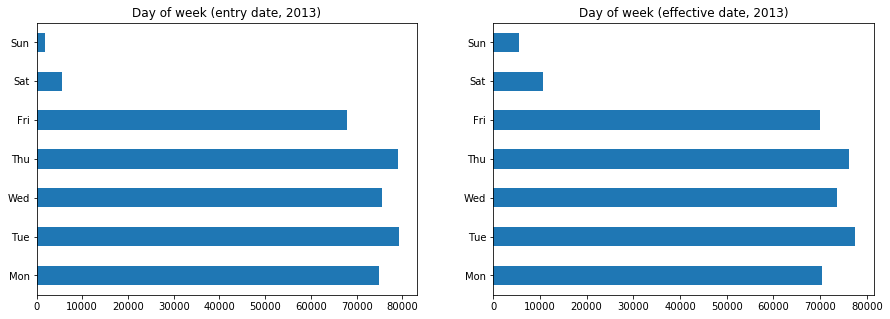

In [13]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
dow_counts.loc[2013, "DOW_entry_date"].plot(kind="barh", title="Day of week (entry date, 2013)", ax=axes[0])
dow_counts.loc[2013, "DOW_effective_date"].plot(kind="barh", title="Day of week (effective date, 2013)", ax=axes[1])

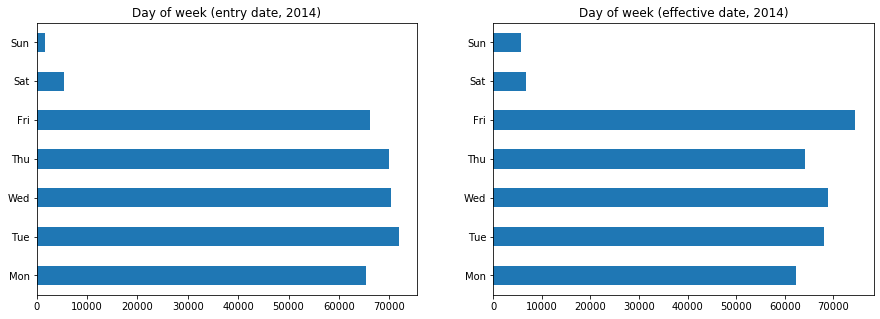

In [14]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
dow_counts.loc[2014, "DOW_entry_date"].plot(kind="barh", title="Day of week (entry date, 2014)", ax=axes[0])
dow_counts.loc[2014, "DOW_effective_date"].plot(kind="barh", title="Day of week (effective date, 2014)", ax=axes[1])

#### Wer bucht am Sonntag?

In [15]:
sunday = df.loc[(df.DOW_effective_date == 6),:].groupby('Fiscal year').\
aggregate({'Source group':'unique', 'Source':'unique', 'GL account code':'unique'})

In [16]:
print('2013 source group: ', len(sunday.loc[2013, 'Source group']))
print(sunday.loc[2013, 'Source group'], '\n')
print('2013 source: ', len(sunday.loc[2013, 'Source']))
print(sunday.loc[2013, 'Source'], '\n')
print('2013 N accounts: ')
print(len(sunday.loc[2013, 'GL account code']), '\n')


print('2014 source group: ', len(sunday.loc[2014, 'Source group']))
print(sunday.loc[2014, 'Source group'], '\n')
print('2014 source: ', len(sunday.loc[2014, 'Source']))
print(sunday.loc[2014, 'Source'], '\n')
print('2014 N accounts: ')
print(len(sunday.loc[2014, 'GL account code']), '\n')

2013 source group:  13
['Fixed assets' 'Purchases' 'Receivables adj' 'Transfers' 'Wages'
 'Accruals' 'GL document' 'Cash out' 'Sales' 'Sales adjustments'
 'Sales manual' 'Goods receipts' 'Cash in'] 

2013 source:  27
['AA-Asset posting' 'FV-Invoice vendors EU' 'FZ-Credit note vendors EU'
 'KD-Service Invoice non-EU' 'FC-Self billing (vendor)'
 'FA-Vendor invoice' 'FB-Vendor credit note' 'EM-Maturity effects'
 'SG-Transfer entry' 'SP-Opening balance' 'SD-Wages & salaries'
 'SE-Provisions' 'SA-G/L account document' 'Z6-Vendor payment home'
 'Z9-Vendors payment foreign' 'EF-Discharge effects' 'CO-Fees'
 'DF-Self billed goods' 'DU-Self billed services non-EU'
 'CA-Customer invoices' 'CU-Invoice EU' 'CY-Invoice non EU'
 'CW-Non EU/Rev.Inv' 'YA-Invoice manual' 'WE-Goods receipt'
 'ZT-Registration Treasury' 'AF-Depreciation posting'] 

2013 N accounts: 
217 

2014 source group:  12
['Purchases' 'Receivables adj' 'GL document' 'Transfers' 'Wages'
 'Accruals' 'Cash out' 'Sales' 'Sales adjustmen

**Functional amount**

In [17]:
amount_summary = df.groupby(['Fiscal year', 'DOW_effective_date']).\
aggregate({'Functional amount':['min', 'max', 'mean', 'std', 'median', 'nunique', 'count']})

amount_summary.columns = amount_summary.columns.droplevel(level=0)

amount_summary.rename(columns={
                               'min':'min_amount', 
                               'max':'max_amount', 
                               'mean':'mean_amount', 
                               'std':'std_amount',
                               'median':'median_amount',
                               'nunique':'n_unique_amounts',
                               'count':'count_amount'
                                }, inplace=True)

In [18]:
amount_summary.round(2)

min_amount   max_amount  mean_amount  \
Fiscal year DOW_effective_date                                          
2013        0                  -90385238.42  90385238.42         -0.0   
            1                  -90000000.00  90000000.00          0.0   
            2                  -28490285.86  28490285.86         -0.0   
            3                  -90000000.00  90000000.00         -0.0   
            4                  -39438328.38  39438328.38         -0.0   
            5                  -46511313.56  48006848.28         -0.0   
            6                  -20973318.32  20973318.32         -0.0   
2014        0                  -69567614.26  69567614.26          0.0   
            1                  -76791233.90  76791233.90          0.0   
            2                  -68000004.00  69398230.90          0.0   
            3                  -76423089.50  76728144.08          0.0   
            4                  -40479732.98  40917323.50          0.0   
            5                  -21596430.32  21596430.32          0.0   
            6                  -21596430.32  21596430.32          0.0   

                                std_amount  median_amount  n_unique_amounts  \
Fiscal year DOW_effective_date                                                
2013        0                   1318540.28          55.36             46036   
            1                    790298.32          59.04             50577   
            2                    318892.24          53.80             47719   
            3                    846813.25          44.40             49710   
            4                    371711.26          48.44             47383   
            5                   1113469.99          23.04              8153   
            6                    855514.71          32.70              4348   
2014        0                    950142.42          87.42             44352   
            1                    858809.38         147.00             48329   
            2                   1073695.63         114.06             48396   
            3                    826181.21          93.94             46329   
            4                    611074.13         120.02             51701   
            5                    921351.15          -0.05              5953   
            6                    782153.56          24.02              4576   

                                count_amount  
Fiscal year DOW_effective_date                
2013        0                          70403  
            1                          77552  
            2                          73589  
            3                          76101  
            4                          70014  
            5                          10752  
            6                           5597  
2014        0                          62390  
            1                          68085  
            2                          68936  
            3                          64150  
            4                          74523  
            5                           6846  
            6                           5685

In [19]:
from collections import Counter

In [20]:
dow = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [22]:
print('The most common functional amounts 2013: ', '\n')
for key, day in dow.items():
    #print(u_value, df.query('DOW_effective_date == @u_value').loc[:, 'Functional amount'].mode())
    print(day)
    data = df.loc[(df.DOW_effective_date == key) & (df['Fiscal year'] == 2013), 'Functional amount']
    c = Counter(data.values)
    for value, counts in c.most_common(3):
        print(value, 'Euro :', counts)
    print('\n')
    

The most common functional amounts 2013:  

Mon
43.68 Euro : 632
37.18 Euro : 550
23.04 Euro : 530


Tue
23.04 Euro : 657
37.18 Euro : 499
-23.04 Euro : 383


Wed
23.04 Euro : 809
59.04 Euro : 608
37.18 Euro : 515


Thu
23.04 Euro : 620
43.68 Euro : 607
37.18 Euro : 472


Fri
37.18 Euro : 535
23.04 Euro : 408
43.68 Euro : 353


Sat
23.04 Euro : 135
43.68 Euro : 118
62.4 Euro : 100


Sun
43.68 Euro : 95
62.4 Euro : 77
37.18 Euro : 54




In [24]:
print('The most common functional amounts 2014: ', '\n')
for key, day in dow.items():
    #print(u_value, df.query('DOW_effective_date == @u_value').loc[:, 'Functional amount'].mode())
    print(day)
    data = df.loc[(df.DOW_effective_date == key) & (df['Fiscal year'] == 2014), 'Functional amount']
    c = Counter(data.values)
    for value, counts in c.most_common(3):
        print(value, 'Euro :', counts)
    print('\n')

The most common functional amounts 2014:  

Mon
-0.2 Euro : 177
0.2 Euro : 176
636.0 Euro : 114


Tue
0.2 Euro : 165
-0.2 Euro : 163
636.0 Euro : 82


Wed
0.2 Euro : 183
-0.2 Euro : 180
424.0 Euro : 95


Thu
-0.2 Euro : 196
0.2 Euro : 192
424.0 Euro : 71


Fri
-0.2 Euro : 269
0.2 Euro : 266
424.0 Euro : 65


Sat
0.4 Euro : 17
66.0 Euro : 15
32.0 Euro : 14


Sun
293.0 Euro : 15
-24.0 Euro : 15
-36.0 Euro : 15




In [15]:
# plt.figure(figsize=(15,8))
# for day in sorted(j13.DOW_effective_date.unique()):
#     data = j13.query("DOW_effective_date == @day")["Functional amount"]
#     sns.kdeplot(data, label=day)
# # wtf is happening with you, seaborn
# # TODO: smth with y axis 

Text(0.5, 0.98, 'Functional amount distribution (day of week), 2013 (y scale log)')

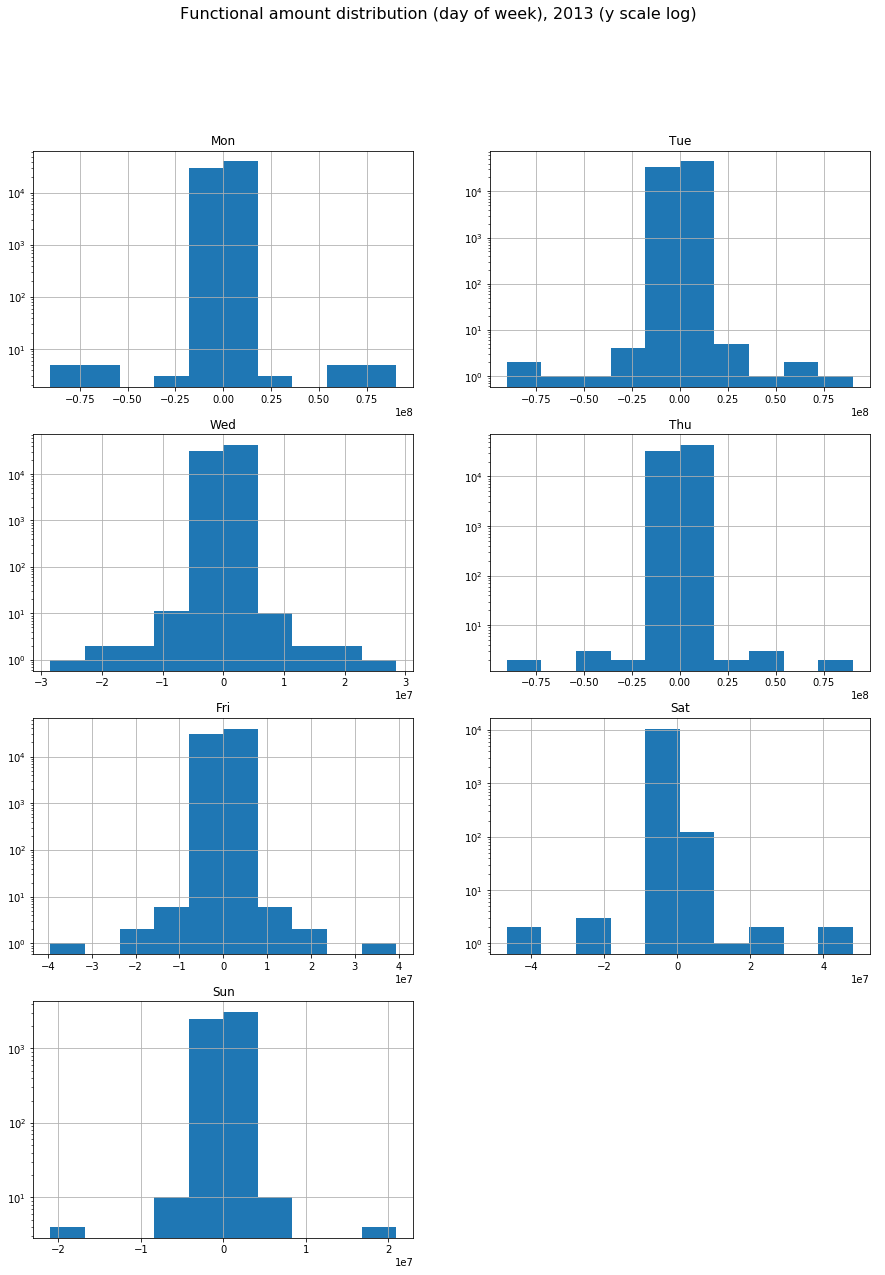

In [18]:
wdays = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
f, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
plt.yscale("log")
for day in sorted(j13.DOW_effective_date.unique()):
    data = j13.query("DOW_effective_date == @day")["Functional amount"]
    data.hist(bins=10, ax=axes[day]).set_title(wdays[day])
    axes[day].set_yscale("log", nonposy='clip')
    #sns.kdeplot(data, label=day, ax=axes[i])
axes[day + 1].axis('off')
f.suptitle("Functional amount distribution (day of week), 2013 (y scale log)", fontsize=16)

Text(0.5, 0.98, 'Functional amount distribution (day of week), 2014 (y scale log)')

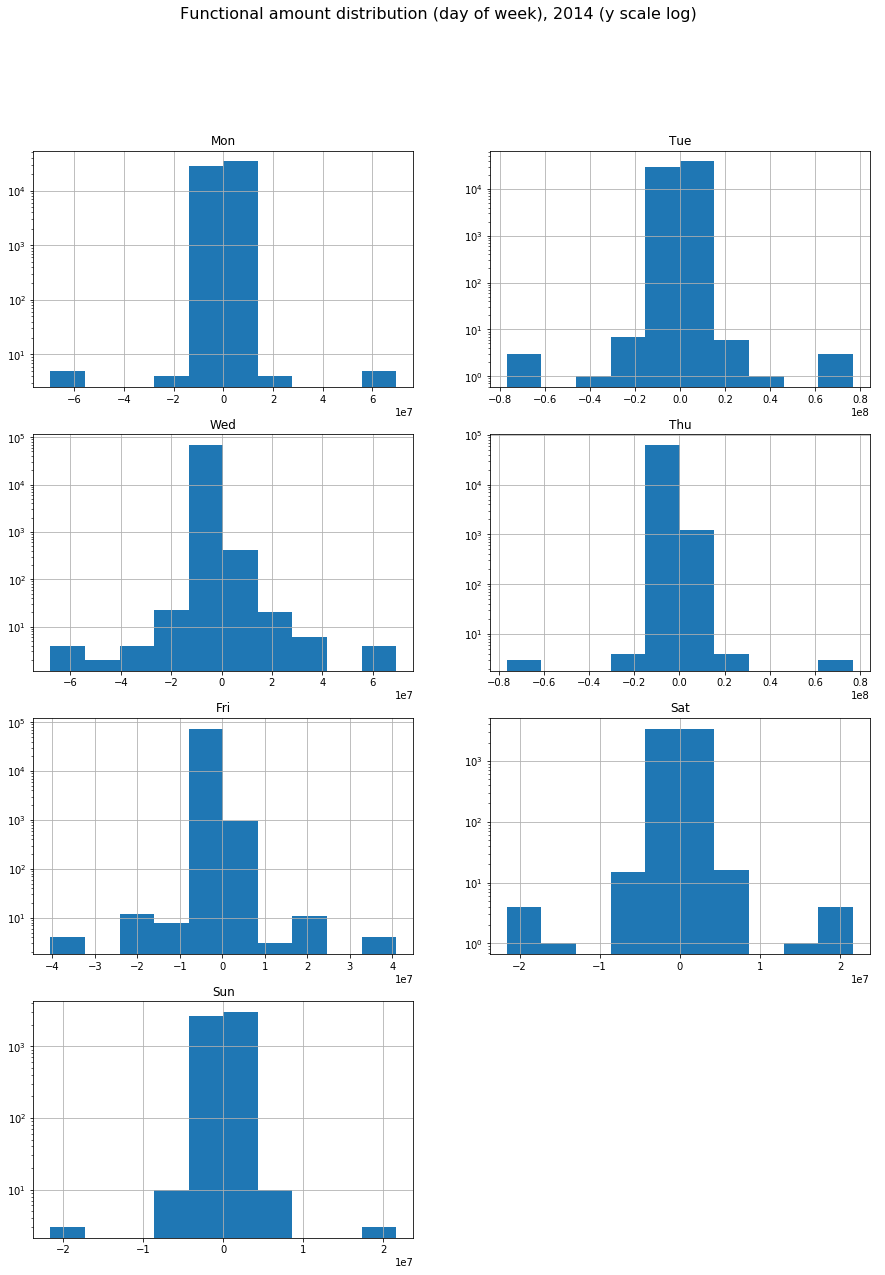

In [20]:
wdays = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
f, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
plt.yscale("log")
for day in sorted(j14.DOW_effective_date.unique()):
    data = j14.query("DOW_effective_date == @day")["Functional amount"]
    data.hist(bins=10, ax=axes[day]).set_title(wdays[day])
    axes[day].set_yscale("log", nonposy='clip')
    #sns.kdeplot(data, label=day, ax=axes[i])
axes[day + 1].axis('off')
f.suptitle("Functional amount distribution (day of week), 2014 (y scale log)", fontsize=16)

#### Die Struktur von "functional amount" hat sich 2014 im Vergleich zu 2013 verändert.

In [27]:
df.groupby(['Fiscal year', 'DOW_effective_date', 'Source group']).aggregate({'JE number':'count'}).\
rename(columns={'JE number':'n_lines'})

n_lines
Fiscal year DOW_effective_date Source group              
2013        0                  Accruals               128
                               Cash in               6918
                               Cash out              3111
                               Fixed assets            32
                               GL document            646
...                                                   ...
2014        6                  Sales                  477
                               Sales adjustments        4
                               Sales manual             9
                               Transfers              837
                               Wages                 1116

[188 rows x 1 columns]

In [6]:
n_lines_year_group = df.groupby(['Fiscal year', 'Source group']).aggregate({'JE number':'nunique'}).\
rename(columns={'JE number':'n_lines'})

#### Wie hat sich die Anzahl Buchungen für Source groups geändert?
was ist "Source group 1"?

In [7]:
n_lines_year_group.loc[2013].sort_values('n_lines', ascending=False).\
rename(columns={'Source group':'Source_group_2013', 'n_lines':'n_lines_2013'}).\
join(n_lines_year_group.loc[2014].sort_values('n_lines', ascending=False).\
rename(columns={'Source group':'Source_group_2014', 'n_lines':'n_lines_2014'}), how='outer')

,n_lines_2013,n_lines_2014
Source group,,
Accruals,686.0,649
Cash in,11097.0,13386
Cash out,5419.0,5275
Fixed assets,87.0,56
GL document,1458.0,1777
Goods receipts,32709.0,21353
Purchases,17065.0,16484
Receivables adj,12324.0,10982
Sales,16167.0,15692


#### Anzahl Buchungen sortiert absteigend

In [8]:
n_lines_year_group.loc[2013].sort_values('n_lines', ascending=False).reset_index().sort_values('n_lines').\
rename(columns={'Source group':'Source_group_2013', 'n_lines':'n_lines_2013'}).\
join(n_lines_year_group.loc[2014].sort_values('n_lines', ascending=False).reset_index().sort_values('n_lines').\
rename(columns={'Source group':'Source_group_2014', 'n_lines':'n_lines_2014'}), how='outer')

,Source_group_2013,n_lines_2013,Source_group_2014,n_lines_2014
0,Goods receipts,32709.0,Goods receipts,21353
1,Purchases,17065.0,Purchases,16484
2,Sales,16167.0,Sales,15692
3,Receivables adj,12324.0,Cash in,13386
4,Cash in,11097.0,Receivables adj,10982
5,Transfers,6909.0,Transfers,6784
6,Cash out,5419.0,Cash out,5275
7,Sales adjustments,4318.0,Sales adjustments,3845
8,Wages,1482.0,GL document,1777
9,GL document,1458.0,Wages,1477


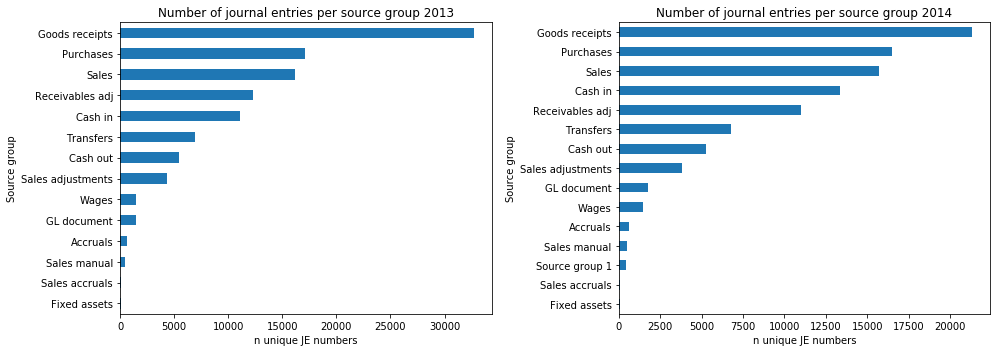

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
n_lines_year_group.loc[2013].sort_values('n_lines', ascending=False)\
.plot(kind="barh", ax=axes[0], legend=False, title="Number of journal entries per source group 2013")
axes[0].invert_yaxis()
axes[0].set(xlabel="n unique JE numbers")
n_lines_year_group.loc[2014].sort_values('n_lines', ascending=False)\
.plot(kind="barh", ax=axes[1], legend=False, title="Number of journal entries per source group 2014")
axes[1].invert_yaxis()
axes[1].set(xlabel="n unique JE numbers")
plt.tight_layout() 

### Outlier detection

In [ ]:
dow_amount = df.loc[:, ['DOW_effective_date', 'Functional amount']]

In [68]:

clf = IsolationForest(n_estimators=100, max_samples=500, contamination="auto", behaviour="new")#max_samples=200)
clf.fit(dow_amount)
y_pred_train = clf.predict(dow_amount)

In [69]:
normal = dow_amount.iloc[np.where(y_pred_train == 1)].sample(1000)
outlier = dow_amount.iloc[np.where(y_pred_train == -1)]#.sample(100)

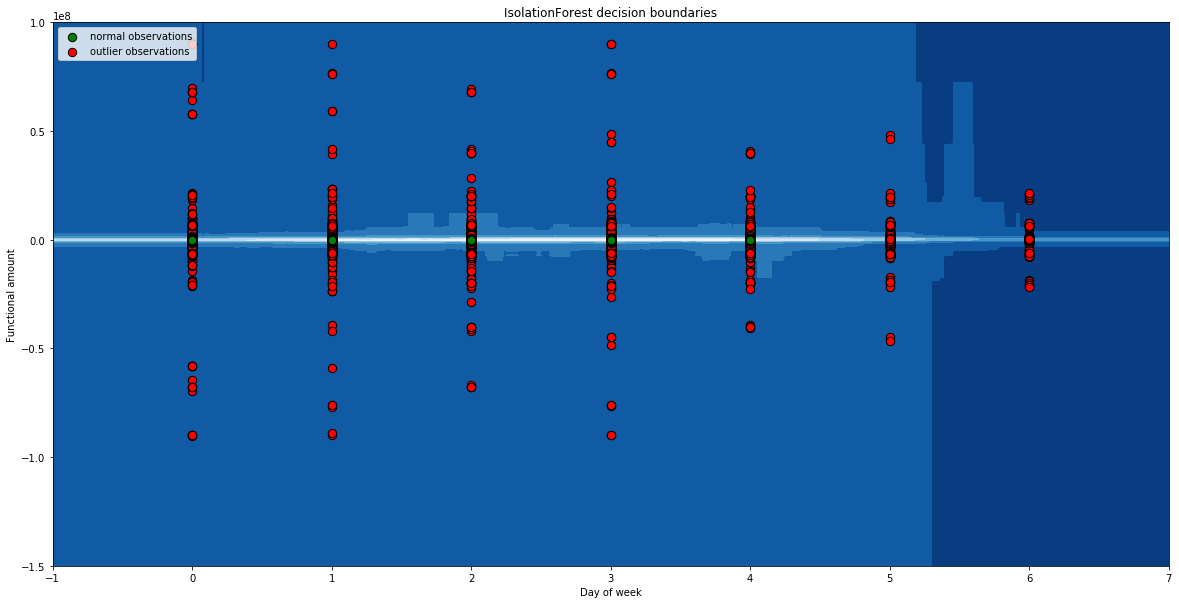

In [70]:
plt.figure(figsize=(20, 10))
xx, yy = np.meshgrid(np.linspace(-1, 7, 500), np.linspace(-1.5e8, 1e8, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest decision boundaries")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b2 = plt.scatter(outlier.iloc[:, 0], outlier.iloc[:, 1], c='red',
                 s=70, edgecolor='k')
b1 = plt.scatter(normal.iloc[:, 0], normal.iloc[:, 1], c='green',
                 s=70, edgecolor='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
#                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-1, 7))
plt.xlabel("Day of week")
plt.ylabel("Functional amount")
#plt.ylim((-5, 5))
plt.legend([b1, b2],
           ["normal observations",
            "outlier observations"],
           loc="upper left")
plt.show()

In [51]:
clf = IsolationForest(n_estimators=200, contamination=0.001)#max_samples=200)
clf.fit(dow_amount)
y_pred_train = clf.predict(dow_amount)

c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [63]:
normal = dow_amount.iloc[np.where(y_pred_train == 1)].sample(1000)
outlier = dow_amount.iloc[np.where(y_pred_train == -1)]#.sample(100)

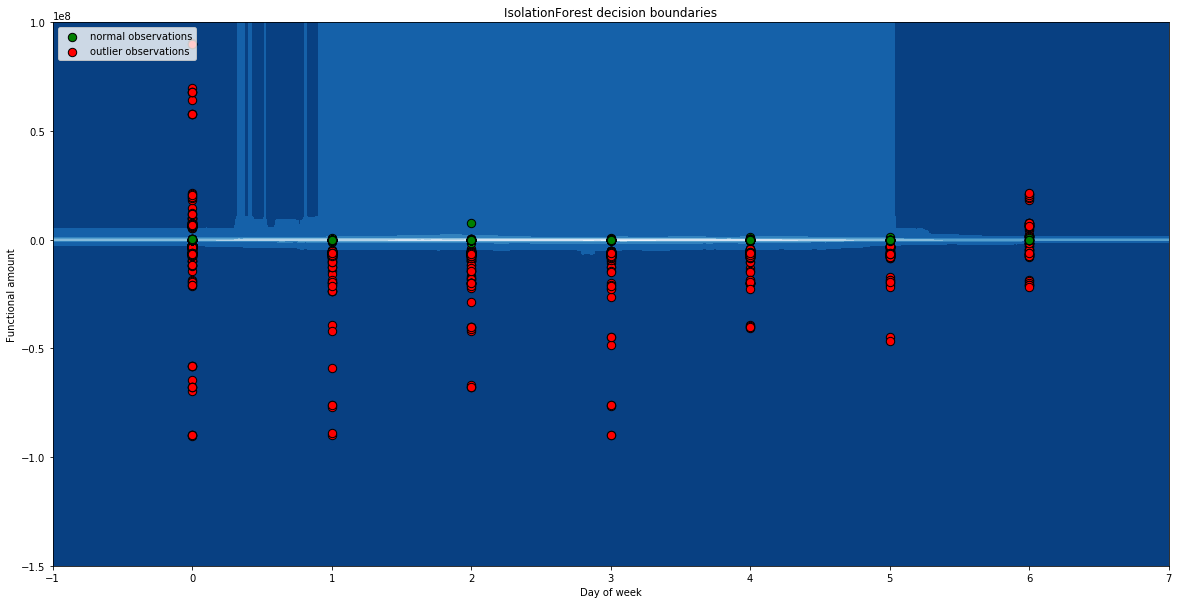

In [65]:
plt.figure(figsize=(20, 10))
xx, yy = np.meshgrid(np.linspace(-1, 7, 500), np.linspace(-1.5e8, 1e8, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest decision boundaries")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b2 = plt.scatter(outlier.iloc[:, 0], outlier.iloc[:, 1], c='red',
                 s=70, edgecolor='k')
b1 = plt.scatter(normal.iloc[:, 0], normal.iloc[:, 1], c='green',
                 s=70, edgecolor='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
#                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-1, 7))
plt.xlabel("Day of week")
plt.ylabel("Functional amount")
#plt.ylim((-5, 5))
plt.legend([b1, b2],
           ["normal observations",
            "outlier observations"],
           loc="upper left")
plt.show()

In [71]:
clf = IsolationForest(n_estimators=300, contamination=0.0001)#max_samples=200)
clf.fit(dow_amount)
y_pred_train = clf.predict(dow_amount)

c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\users\даша\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


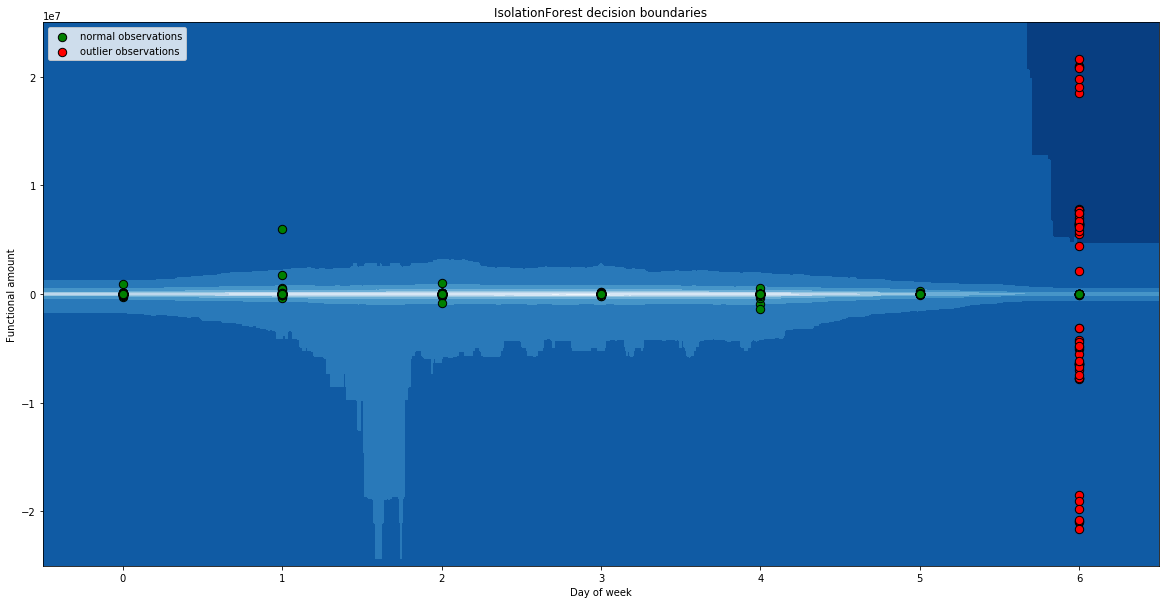

In [78]:
normal = dow_amount.iloc[np.where(y_pred_train == 1)].sample(1000)
outlier = dow_amount.iloc[np.where(y_pred_train == -1)]#.sample(100)
#min_x, max_x = 1.1*outlier.iloc[:, 0].min(), 1.1*outlier.iloc[:, 0].max()
#min_y, max_y = 1.1*outlier.iloc[:, 1].min(), 1.1*outlier.iloc[:, 1].max()

plt.figure(figsize=(20, 10))
xx, yy = np.meshgrid(np.linspace(-0.5, 6.5, 500), np.linspace(-2.5e7, 2.5e7, 500))
##xx, yy = np.meshgrid(np.linspace(min_x, max_x, 500), np.linspace(min_y, max_y, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest decision boundaries")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b2 = plt.scatter(outlier.iloc[:, 0], outlier.iloc[:, 1], c='red',
                 s=70, edgecolor='k')
b1 = plt.scatter(normal.iloc[:, 0], normal.iloc[:, 1], c='green',
                 s=70, edgecolor='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
#                s=20, edgecolor='k')
plt.axis('tight')
#plt.xlim((-1, 7))
plt.xlabel("Day of week")
plt.ylabel("Functional amount")
#plt.ylim((-5, 5))
plt.legend([b1, b2],
           ["normal observations",
            "outlier observations"],
           loc="upper left")
plt.show()